In [ ]:
from matplotlib import pyplot as plt
import math
import numpy as np
import sympy as sp
from numpy import log
from numpy import sin
from numpy import cos
from numpy import exp
import math
from scipy import integrate as integ

In [ ]:
def f(x): # Вариант 5
  return (x ** 3) * (np.sqrt(1 - x ** 2))


# Функция для получения значения интеграла маленькой части
def integrate(a, b, n, f, eps):
  last = float('inf')
  integral = 0
  n -= 1
  while np.abs(last - integral) >= eps: # Тот же цикл, что и в прошлой лабе
    last = integral
    n *= 2
    xi = np.linspace(a, b, n + 1)
    yi = f(xi)
    h = xi[1] - xi[0]
    vec = np.array([1.] + [2. if i % 2 == 0 else 4. for i in range(1, len(yi) - 1)] + [1.]) # Формула Симпсона
    integral = h * np.sum(yi * vec) / 3
  print(n)
  return integral

a = 0 # Начало и конец диапазона
b = 1
n = 2 # Начальное количество узлов.
eps = 10 ** -2 # Внешняя eps
eps_2 = 10 ** -5 # Внутреняя eps
# Чем больше внятренняя точность, тем лучше общий показатаель интеграла

new_a = (a + np.abs(a - b)) / 2
integral1 = integrate(new_a, b, n, f, eps_2)
difference = float('inf')

while difference >= eps: # Сравниваем значение значение частей интеграла от общего значения.
  old_a = new_a
  new_a -= (a + old_a) / 2
  integral2 = integral1 + integrate(new_a, old_a, n, f, eps_2)
  difference = np.abs(integral1 - integral2)
  integral1 = integral2


print(f'eps: {eps}\nпромежуточная eps: {eps_2}\nПромежуток: ({a}, {b}]\nЗначение интеграла по формуле Симпсона: {integral2}')
s, err = integ.quad(f, a, b)
print(f"Интеграл, вичисленный библиотекой: {s}")
print(f"Разница : {abs(integral2 - s)}")
print(f"Разница : {(integral2 - s) < eps}")
print(n)

512
4
4
eps: 0.01
промежуточная eps: 1e-05
Промежуток: (0, 1]
Значение интеграла по формуле Симпсона: 0.133268443430378
Интеграл, вичисленный библиотекой: 0.13333333333332276
Разница : 6.488990294475916e-05
Разница : True
2


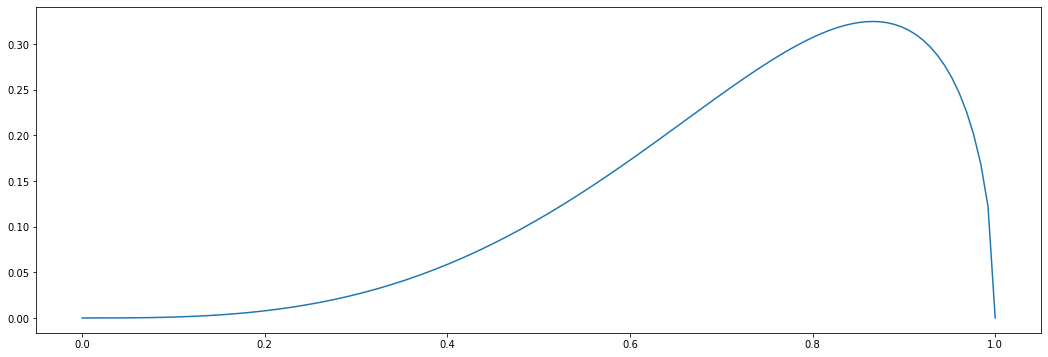

In [ ]:
x = np.linspace(a, b, 128)
y = [f(i) for i in x ]
plt.figure(figsize=(18,6))
plt.plot(x, y)
plt.show()